In [30]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt


In [32]:
data = pd.read_csv("LRC.data", sep=',')
data.sample()


,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
15128,L,3,6,5,4,5,7,8,3,5,6,7,10,5,11,5,6


In [34]:
x = data.iloc[:, 1:17]
y = data.select_dtypes(include=[object])
x, y

(       2   8  3  5  1  8.1  13  0  6  6.1  10  8.2  0.1  8.3  0.2  8.4
 0      5  12  3  7  2   10   5  5  4   13   3    9    2    8    4   10
 1      4  11  6  8  6   10   6  2  6   10   3    7    3    7    3    9
 2      7  11  6  6  3    5   9  4  6    4   4   10    6   10    2    8
 3      2   1  3  1  1    8   6  6  6    6   5    9    1    7    5   10
 4      4  11  5  8  3    8   8  6  9    5   6    6    0    8    9    7
 ...   ..  .. .. .. ..  ...  .. .. ..  ...  ..  ...  ...  ...  ...  ...
 19994  2   2  3  3  2    7   7  7  6    6   6    4    2    8    3    7
 19995  7  10  8  8  4    4   8  6  9   12   9   13    2    9    3    7
 19996  6   9  6  7  5    6  11  3  7   11   9    5    2   12    2    4
 19997  2   3  4  2  1    8   7  2  6   10   6    8    1    9    5    8
 19998  4   9  6  6  2    9   5  3  1    8   1    8    2    7    2    8
 
 [19999 rows x 16 columns],
        T
 0      I
 1      D
 2      N
 3      G
 4      S
 ...   ..
 19994  D
 19995  C
 19996  T
 19997

In [36]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=20)

In [38]:
scaler = StandardScaler()
scaler.fit(xtrain)

xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)

In [39]:
mlp = MLPClassifier(hidden_layer_sizes=(250, 300), max_iter=1000000, activation='logistic')

mlp.fit(xtrain, ytrain.values.ravel())

MLPClassifier(activation='logistic', hidden_layer_sizes=(250, 300),
              max_iter=1000000)

In [40]:
ypred = mlp.predict(xtest)

cmatrix = confusion_matrix(ytest, ypred)

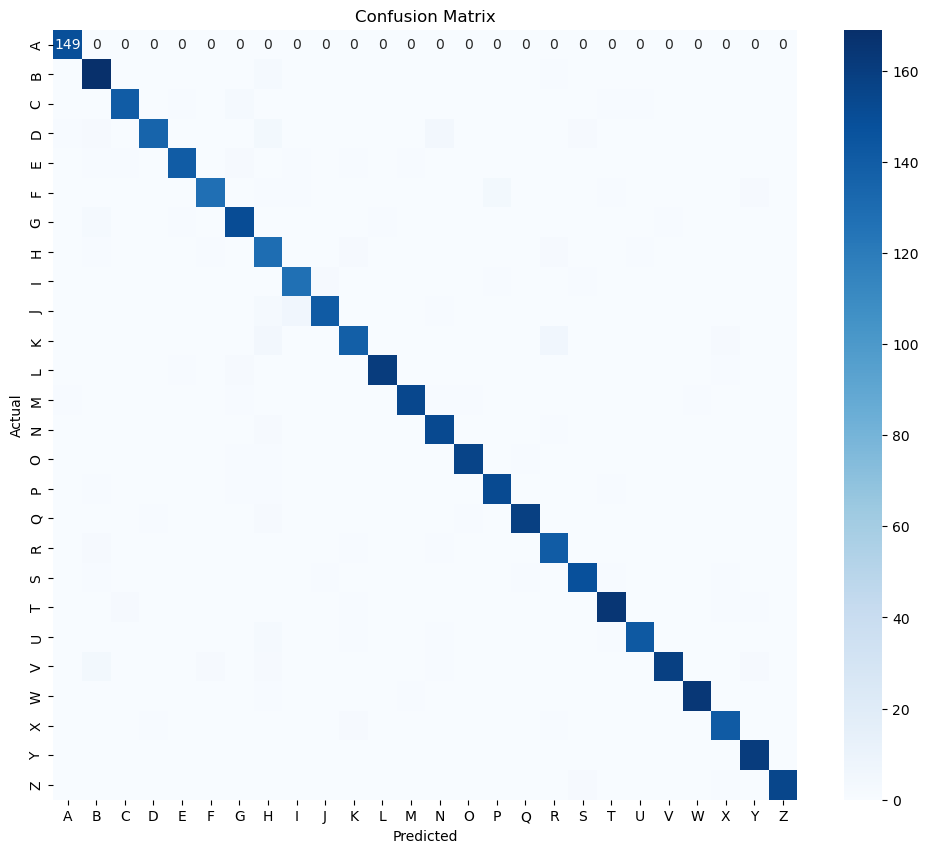

In [42]:
plt.figure(figsize=(12, 10))
sns.heatmap(cmatrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"),
            yticklabels=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [62]:
cm=mlp.score(xtest, ytest)
cm
# print("Model Score (MLPClassifier.score):", score)

0.96425

In [66]:
print("Predictions:", predictions)

Predictions: ['C' 'V' 'T' ... 'T' 'Q' 'R']


In [46]:
print("Accuracy:", accuracy_score(ytest, predictions))

Accuracy: 0.96425
